# Kilotoneladas de gases de efecto invernadero por pais

A00827092 Maria Fernanda Serna

### Carga de Archivo

In [1]:
pip install xlrd

     |████████████████████████████████| 96 kB 3.0 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

     |████████████████████████████████| 242 kB 4.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('datasets/base de datos 2.csv',
                skiprows=range(4)
                )
df.head()

,Country Name,Country Code,Region,IncomeGroup,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,AFG,South Asia,Low income,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,...,58650,66750,74800,84620,93730,95370,97300,98920,NaN,NaN
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,...,86040,84930,88410,88980,90620,91240,87180,79730,NaN,NaN
2,Albania,ALB,Europe & Central Asia,Upper middle income,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,...,9630,9240,9440,9930,9850,9720,10290,10080,NaN,NaN
3,United Arab Emirates,ARE,Middle East & North Africa,High income,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,...,214630,226570,237630,240020,252850,259650,269820,263240,NaN,NaN
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,...,344800,348940,358180,356100,362560,366370,367320,365650,NaN,NaN


In [6]:
df.columns=list(map(str,df.columns))

In [7]:
all(isinstance(column,str)for column in df.columns)

True

In [8]:
df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup',
       'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')

In [9]:
df['Total']=df.iloc[:,5:].sum(axis=1)
df.head()
df.set_index('Country Name',inplace=True)

In [10]:
df = df.drop(['Country Code','Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969','2019', '2020'],
        axis = 1, 
        )

df = df.drop('Russian Federation')

In [11]:
años=list(map(str,range(1970,2019)))
años

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

### Introduccion

##### La base de datos se recupero de The World Bank, la cual fue generada por el centro de Carbon Dioxide Information Analysis Center, Environmental Sciences Division, Oak Ridge National Laboratory, Tennessee, United States.

##### Enlace a The World Bank para descargar: https://data.worldbank.org/indicator/EN.ATM.GHGT.KT.CE?view=chart 

##### Descripcion de las variables

La base de datos, despues de ser limpiada, tiene las siguientes columnas.

In [12]:
df.columns

Index(['Region', 'IncomeGroup', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', 'Total'],
      dtype='object')

* 'Country Name' es un variable cualitativa, la cual es nuestro índice y muestra el nombre de los países con los datos
* 'Region' es un variable cualitativa, la cual explica la región donde está el país bajo estudio
* 'IncomeGroup' es un variable cualitativa, la cual explica el tipo de ingreso promedio que se tiene  en el país respectivo
* '1970' - '2018' es una variable cuantitativa, explica la cantidad total por año de kilotoneladas de gases de efecto invernadero (kt of CO2 equivalent) por cada país bajo estudio
* 'Total' es una variable cuantitativa, la cual explica la cantidad total de kilotoneladas de gases de efecto invernadero a través de 1970-2018

La tabla se ve de la siguiente manera:

In [13]:
df

,Region,IncomeGroup,1970,1971,1972,1973,1974,1975,1976,1977,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,Low income,14306.616300,14391.77820,13040.848000,13535.754100,14945.96820,14574.164000,14746.851000,15247.281000,...,44910,58650,66750,74800,84620,93730,95370,97300,98920,1.356807e+06
Angola,Sub-Saharan Africa,Lower middle income,60648.601080,39162.17143,42205.650700,44252.669120,40179.23350,44429.300030,38448.024090,43563.412180,...,84120,86040,84930,88410,88980,90620,91240,87180,79730,2.759397e+06
Albania,Europe & Central Asia,Upper middle income,6960.868200,6950.03610,7613.266100,7348.492100,7632.66430,7873.037000,8470.978400,8948.980900,...,9130,9630,9240,9440,9930,9850,9720,10290,10080,4.538428e+05
United Arab Emirates,Middle East & North Africa,High income,32962.189410,41377.84513,44905.462750,56875.507820,57411.52655,57798.603420,70352.619200,69646.400200,...,208580,214630,226570,237630,240020,252850,259650,269820,263240,5.806373e+06
Argentina,Latin America & Caribbean,Upper middle income,221957.023000,213551.78840,223912.278800,226956.033300,229456.38000,233416.770000,247051.660000,247370.860000,...,334590,344800,348940,358180,356100,362560,366370,367320,365650,1.380085e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,East Asia & Pacific,Lower middle income,230.166810,248.10720,248.292490,273.713730,295.98076,299.019970,307.014010,307.471320,...,740,760,760,760,820,810,860,850,870,2.557503e+04
Samoa,East Asia & Pacific,Lower middle income,116.577153,117.17352,117.292399,119.462904,130.82467,132.227594,132.698335,139.924788,...,520,530,540,550,570,620,660,670,690,1.797933e+04
"Yemen, Rep.",Middle East & North Africa,Low income,4839.520900,5099.19640,5353.745800,5678.184100,5872.29310,5917.569300,6186.568800,6264.113400,...,35610,32390,31470,38350,38810,26050,22740,21970,21760,8.692925e+05


### Pregunta de investigación 1: ¿Cuáles son los 5 países que producen la mayor cantidad de kilotoneladas de gases de efecto invernadero a través de 1970-2018? De la misma manera, ¿cuáles son los 5 países que producen la menor cantidad?

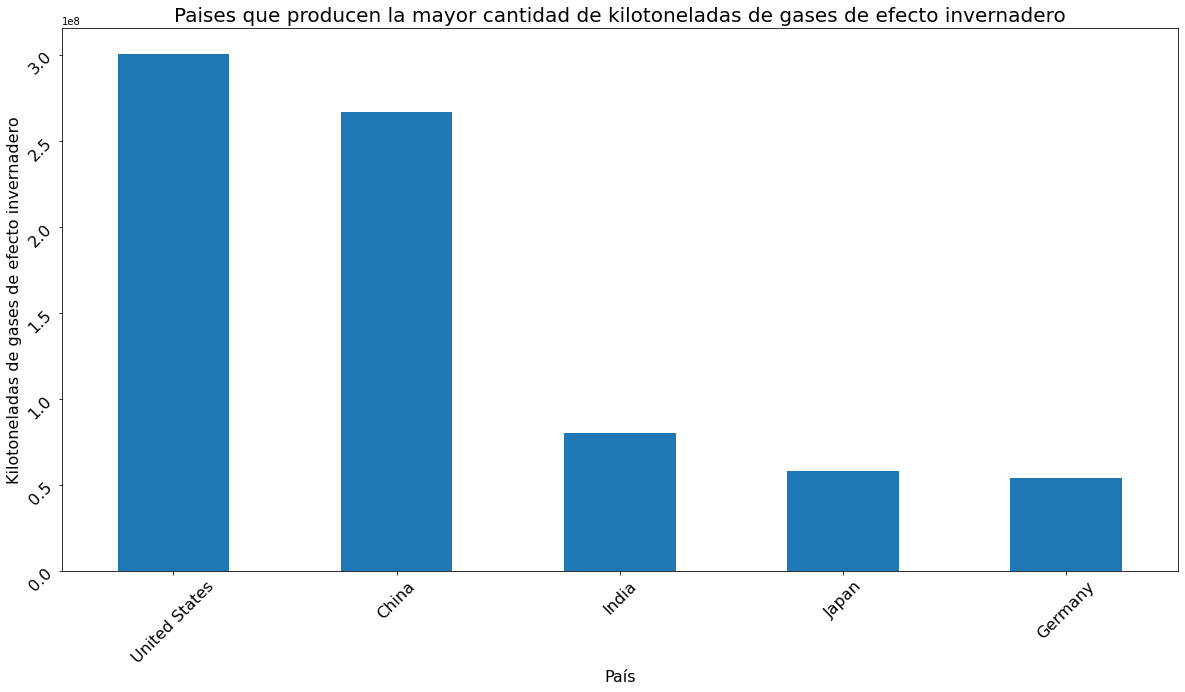

In [14]:
df_topfive=df.sort_values(by='Total', 
                          ascending=False,
                          axis=0,
                         )
df_topfive=df_topfive.head(5)
df_topfive=df_topfive.loc[:,'Total']

df_topfive.plot(kind='bar',figsize=(20,10))

plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Paises que producen la mayor cantidad de kilotoneladas de gases de efecto invernadero', fontsize=20)

plt.xlabel('País', fontsize=16)
plt.ylabel('Kilotoneladas de gases de efecto invernadero', fontsize=16)
plt.show()
#cambiar color

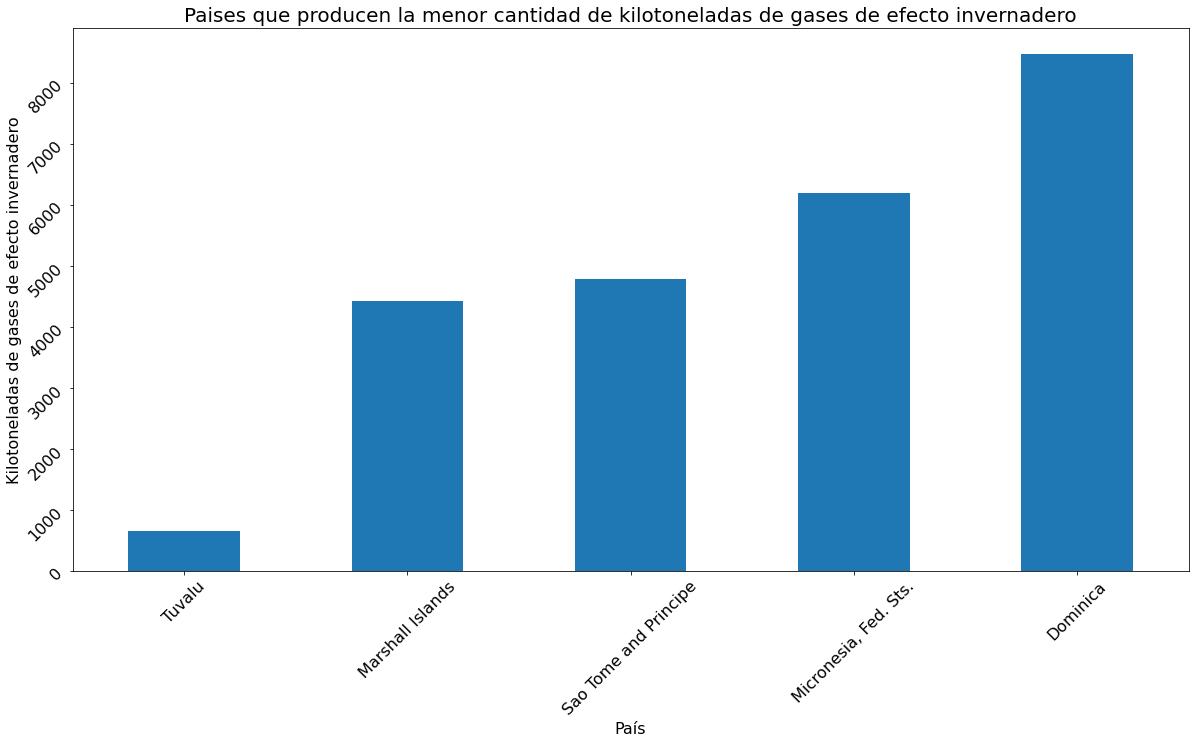

In [15]:
df_bottomfive=df.sort_values(by='Total', 
                          ascending=True,
                          axis=0,
                         )

df_bottomfive=df_bottomfive.head(5)
df_bottomfive=df_bottomfive.loc[:,'Total']

df_bottomfive.plot(kind='bar',figsize=(20,10))

plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Paises que producen la menor cantidad de kilotoneladas de gases de efecto invernadero', fontsize=20)

plt.xlabel('País', fontsize=16)
plt.ylabel('Kilotoneladas de gases de efecto invernadero', fontsize=16)
plt.show()
#cambiar color

##### Conclusión

* En la primera gráfica, podemos ver que los países que producen más contaminación son: United States, China, India, Japan y Germany. 
  Como sabemos, estos países tienen un rol importante en la economía global y por ende, contribuyen mucho en la producción de gases de efecto invernadero.
* En la segunda gráfica, podemos ver que los países que producen menos contaminación son: Dominicana, Miconesia, Fed. Sts., Sao Tome and Principe, Marshall Islands y Tuvalu. 
  Esto dado a que son países muy pequeños y por ende, no producen casi nada de contaminación.

### Pregunta de investigación 2: ¿Cuál es la relación que hay entre el tipo de ingreso con la cantidad total de las kilotoneladas de gases de efecto invernadero producidos a través de los años?

In [20]:
my_pivot=pd.pivot_table(df,
                        index='IncomeGroup',
                        values='Total',
                        margins=True
                       )
my_pivot

,Total
IncomeGroup,
High income,1.504587e+07
Low income,2.236026e+06
Lower middle income,5.570734e+06
Upper middle income,1.026910e+07
All,8.904392e+06


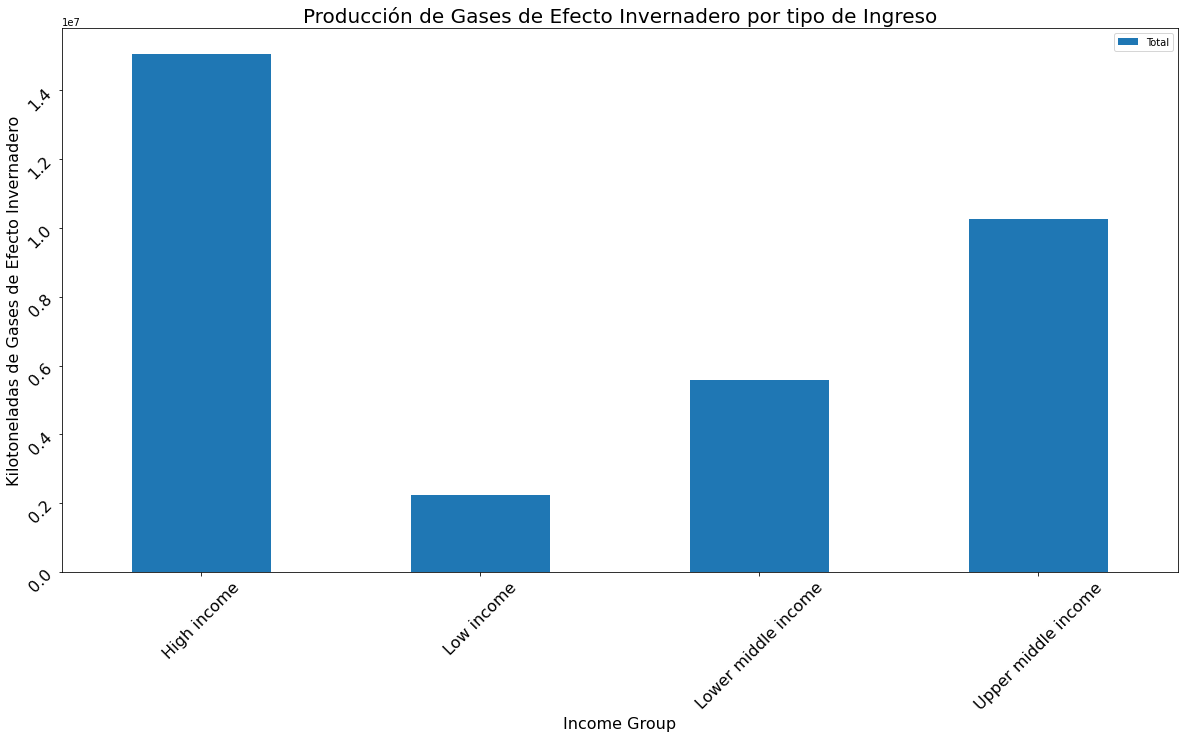

In [21]:
my_pivot = my_pivot.drop('All')

my_pivot.plot(kind='bar',figsize=(20,10))

plt.xlabel('Income Group', fontsize = 16)
plt.xticks(fontsize = 16, rotation = 45)

plt.ylabel('Kilotoneladas de Gases de Efecto Invernadero', fontsize = 16)
plt.yticks(fontsize = 16, rotation = 45)

plt.title('Producción de Gases de Efecto Invernadero por tipo de Ingreso',
          fontsize = 20)

plt.show()

##### Conclusión

* Podemos notar que si existe una relación entre el tipo de ingreso del país con la cantidad de kilotoneladas de gases de efecto invernadero producidas. 
* Entre más ingresos tenga la población del país, más gases de efecto invernadero se producen.

### Pregunta de investigación 3: ¿Cómo se ve México en cuánto a su producción de gases de efecto invernadero a través de los años? ¿Tiene algún tipo de tendencia?

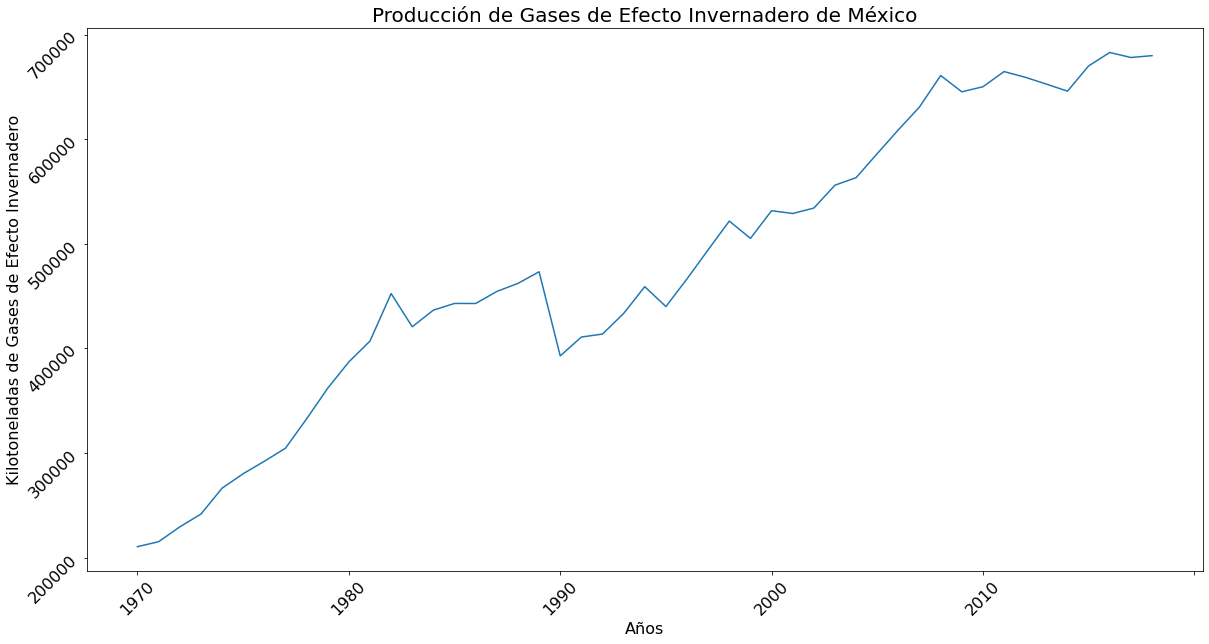

In [18]:
df.loc['Mexico', años].plot(figsize=(20,10))
plt.xlabel('Años', fontsize = 16)
plt.xticks(fontsize = 16, rotation = 45)

plt.ylabel('Kilotoneladas de Gases de Efecto Invernadero', fontsize = 16)
plt.yticks(fontsize = 16, rotation = 45)

plt.title('Producción de Gases de Efecto Invernadero de México',
          fontsize = 20)

plt.show()

##### Conclusión

* Como se muestra en la gráfica, la tendencia de México es creciente. Podríamos investigar con más profundidad a que se debe esto. 

### Limitaciones

* Los datos se tuvieron que filtrar porque no se tenían todos los datos completos de todos los países. 
* Existe mucha información complementaria que podría hacer más completa esta investigación, pero por cuestiones de tiempo, no se puede hacer.

### Pasos a seguir

* Ver la siguiente entrega para poder seguir investigando más 
* Seguir aprendiendo diferentes maneras en las que se puede hacer estadística descriptiva